<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/Chapters/Chapter11MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Monte Carlo Simulation
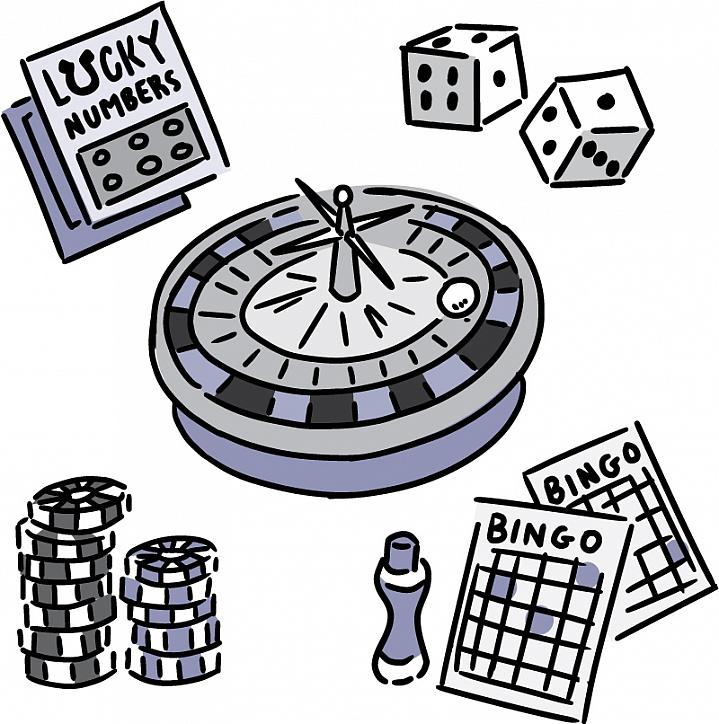

## History

The Monte Carlo Method was devised by Stanislaw Ulam during World War II. Ulam was a Polish mathematician who greatly contributed to the development of the hydrogen bomb. Ulam also contributed to the Manhattan Project, which was developing nuclear weapons during WWII.

As they were finishing up the project, Stanislaw Ulam became afflicted with a viral encephalitis that caused him to go into a coma. While he was recovering from this potentially brain-damaging virus, Ulam frequently played the game of Solitaire. He wanted to deduce the probability of him winning a game, so he played the game hundreds of times and documented his results. This was the first step towards the creation of the Monte Carlo Simulation.

Stanislaw Ulam realized that the existence of computers made such statistical methods incredibly practical. He then took his idea to his coworker and boss, John von Neumann, who recognized the significance in his discovery. They both proceeded to develop the idea further until they created the simulation that is now used widely in computational sciences. The Monte Carlo Method is based on chance and probability, which is connected to gambling. They named it after the giant gambling Capital city in Europe, Monaco.






## Introduction

The Monte Carlo Method is designed to make predictions that take every imaginable factor into account and display every possible outcome.

It is an effective means to portray the impact of risk and uncertainty when it comes to making decisions. Because we all make decisions and take risks every day, Monte Carlo is wildly popular among a plethora of different fields. This includes Astronomy, Climate Change, Engineering Financing, Weather, various scientific fields, and so much more. It is a safe bet to assume that any career path that involves making decisions will utilize Monte Carlo in some capacity.

Because we all face ambiguity and variability in our lives, using Monte Carlo simulations is a surefire way to allow for better decision making in the face of absolute uncertainty.

## Examples

##Coin Flip
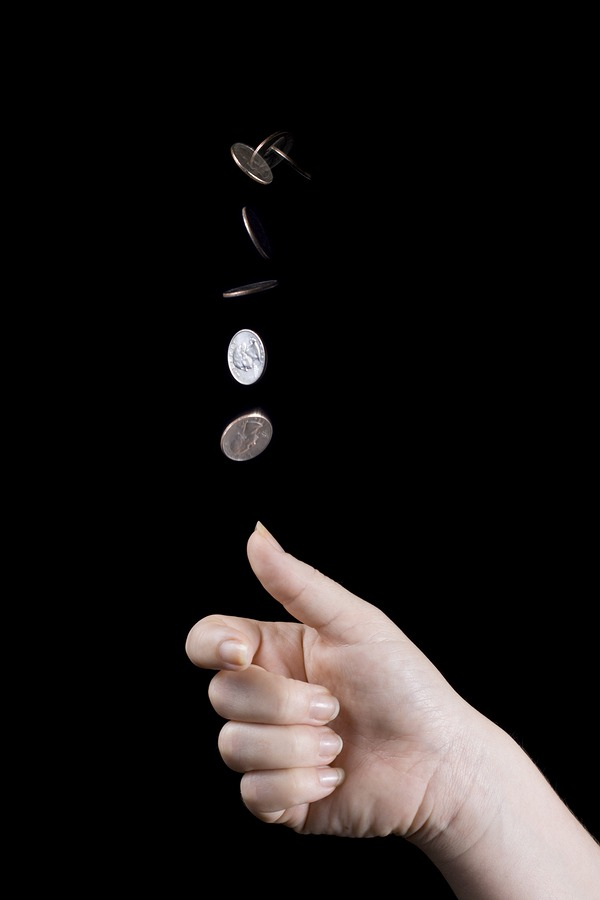

We would like to show to probability of heads in a series of 10 coin flips. The first thing we would do is define our coin flip. In this example, we will be importing random that that we may use random.uniform to generate a random real number between 0 and 1. We assign any number greater than 0.5 to be true(heads) and any number that is not greater than 0.5 to false(tails).



In [49]:
import random
import matplotlib.pyplot as plt

def coin_toss():

   x = random.uniform(0, 1)

   if x > 0.5:
        # Heads for True
       return True
   else:
       # Tails for False
        return False

Our next step is to create our experiment. We define $N$ as our number of tosses for our experiment and create a list to store the results. When this for loop is ran, it will generate a 1 if we got heads and a 0 if we got tails and store the result in our list. After the loop is complete, we sum up our list then calculate the mean.

In [50]:

# Number of tosses in each experiment
N = 10
   # List for the results
results = []

    # Toss the coin N times and store in a list
for i in range(N):
   result = coin_toss()
   results.append(result)

   n_heads = sum(results)
   p_heads = n_heads/N

Now that we have our experiment running, we would like to conduct our experiment multiple times to get an accurate probabilty. We create a new list named prob that will store the results for every complete experiment. Then we create a for loop that runs our experiment as many times as we'd like. In this example, we are running it 10000 times. We've added "prob.append(p_heads)" into our experiment as this will allow us to store our results in our new list. After our 10000 experiments are complete, we calculate the overall mean to give us our probability of heads.

In [51]:
prob = []

# Number of times the experimemnt is conducted
for i in range(10000):

   # Number of tosses in each experiment
   N = 10
   # List for the results
   results = []

    # Toss the coin N times and store in a list
   for i in range(N):
      result = coin_toss()
      results.append(result)

   n_heads = sum(results)
   p_heads = n_heads/N
   prob.append(p_heads)

# average the probability of heads over the number of experiments
p_heads_FINAL = sum(prob)/10000
print("Probability of heads is {:.5f}\n".format(p_heads_FINAL))

Probability of heads is 0.50073



If we import matplotlib.pyplot, we can create a histogram that will show us the distrubution of head to tails throughout our experiment.

(array([  10.,  101.,  430., 1186., 2016., 2499., 2027., 1146.,  474.,
          91.,   20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <BarContainer object of 11 artists>)

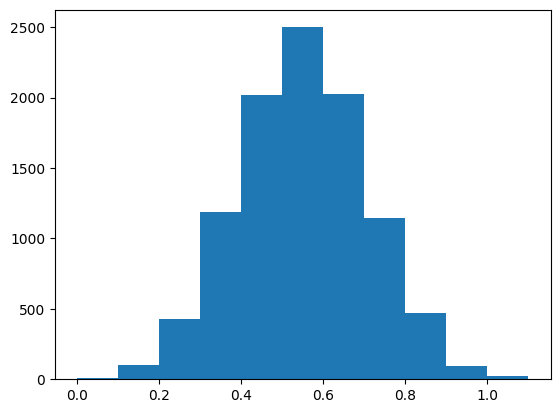

In [52]:
plt.hist(prob, bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 1.1])

## Monty Hall Problem

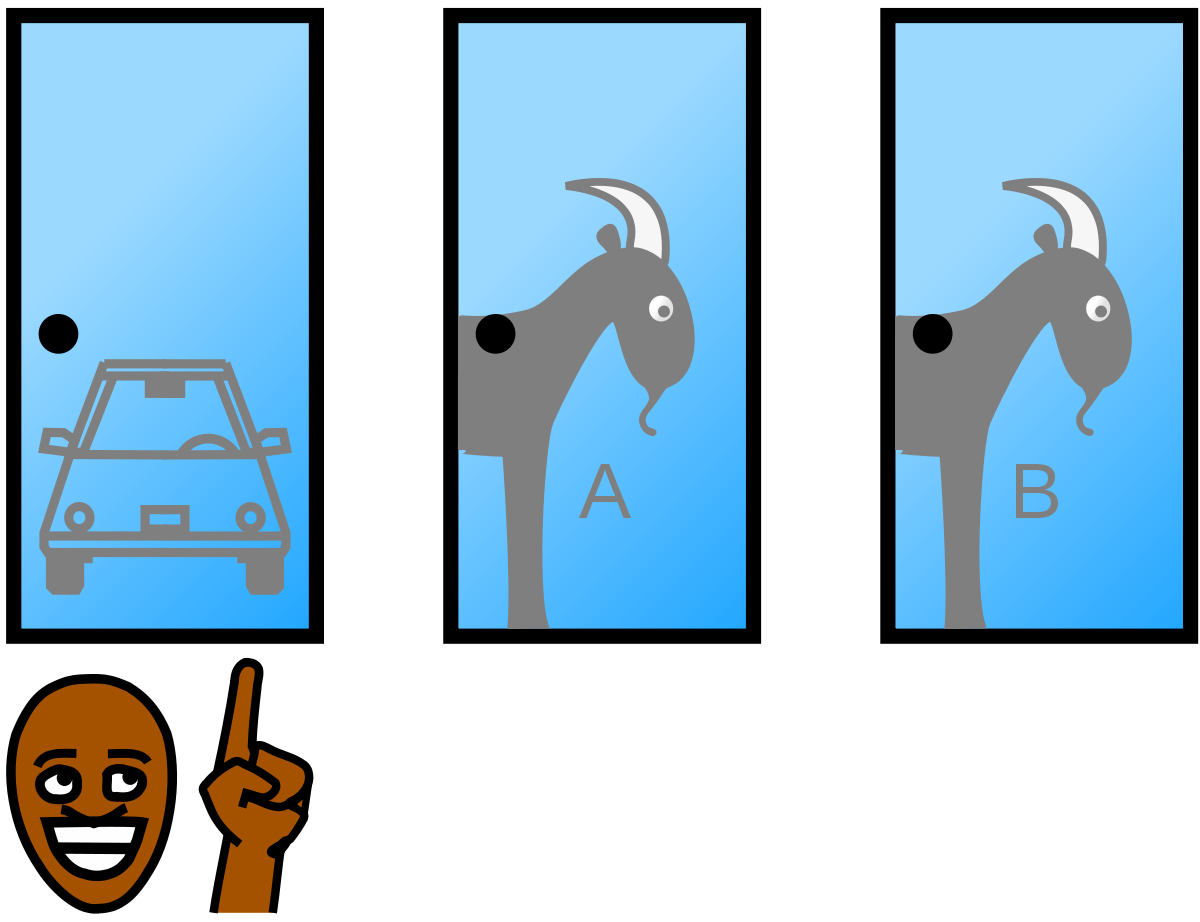

You are a guest on a game show, and you have the choice of picking 1 of 3 doors: Behind one door is a car; behind each of the other two doors is a goat. You pick a door, let’s say door 1, and the host, who doesn't know what’s behind the doors, opens another door, door 3, which has a goat. The host who picks their door knows what is behind the door, but you do not know what is behind your's. The host then asks you: "Do you want to stick with your choice or choose another door? Is it in our favor to switch doors in the end?" You have a chance to switch or stick with your door you chose. Will it work out for you in the end if you switch or stick with your original choice and what is the probability?

We start by importing random so that we may randomize the doors and the contestants selection and importing matplotlib.pyplot as plt so that we can see our results in a graph. Then we create our three doors and create two lists that will store how many wins we got when sticking with our choice and how many wins we got if we were to switch doors.

In [53]:
import random
import matplotlib.pyplot as plt

#We are going with 3 doors :
#1 - Car
#2 - Goats
doors = ["goat","goat","car"]

#Empty lists to store probability values :
switch_win_probability = []
stick_win_probability = []

Now we create our experiment. We define our function as monte_carlo. We start our experiment by shuffling the doors with random.shuffle, then we get a random selection from the contestant with random.randrange. If the contestant did not select the car, we add 1 to our switch wins. If the contestant did get the car, we add 1 to the stick wins. We add our result to the list and find our probability. We then plot our list and print the probability.

In [54]:
def monte_carlo(n):

    #Calculating switch and stick wins :
    switch_wins = 0
    stick_wins = 0

    for i in range(n):

        #Randomly placing the car and goats behind the three doors :
        random.shuffle(doors)

        #Contestant's choice :
        k = random.randrange(2)

        #If the contestant doesn't get car :
        if doors[k] != 'car':
            switch_wins += 1

        #If the contestant got car :
        else:
            stick_wins += 1

        #Updating the list values :
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))

        #Plotting the data :
        plt.plot(switch_win_probability)
        plt.plot(stick_win_probability)

    #plotting the expected value
    plt.axhline(y=0.66666, color='r', linestyle='-')
    plt.axhline(y=0.33333, color='g', linestyle='-')

   #plotting the expected value
    plt.axhline(y=0.66666, color='r', linestyle='-')
    plt.axhline(y=0.33333, color='g', linestyle='-')

    #Print the probability values :
    print('Winning probability if you always switch:',switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])

To finish, we call our function with the number of times we would like to run the experiment.

Winning probability if you always switch: 0.672
Winning probability if you always stick to your original choice: 0.328


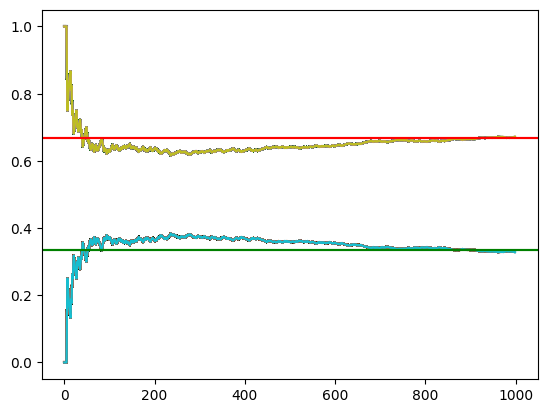

In [55]:
monte_carlo(1000)

As you can see, we also have a graph showing the probability throughout our experiments. The graph list the expected value of .66 for switching and .33 for sticking. The probability is far more random at the start of our experiments and approaches the expected value after more experiments are ran. This is because of the **law of large numbers** which states that the more trials we run, the closer we are to reaching our expected value. In the this Monty Hall game show example, the chances of switching doors with the host will work out more in favor for you other than staying with the original door you chose.

 ## Craps Simulator for One Shooter
 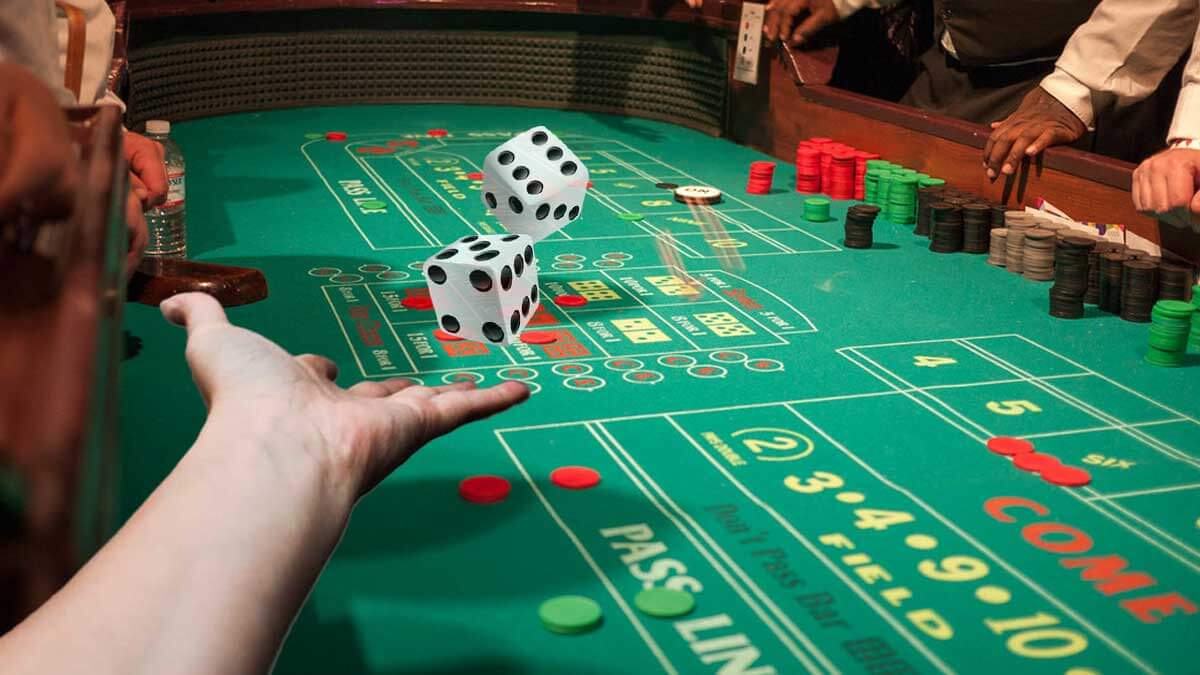

Because the Monte Carlo Simulation is connected with gambling and many card games. In this example we wanted to look at the game of Craps. Basically, you roll a pair dice and you win if you roll a 7 or 11. If you roll a 2, 3 or 12, you "crap out". It is opposite if you end up betting a certain amount of money and whether or not you "Pass Line or Don't Pass Line". Pass line is when you bet the shooter (person who is rolling the dice) will win by rolling a natural, which is a 7 or 11. The Don't Pass Line is when you bet the shooter they will lose if they end up rolling a 2,3,12, or 7. In this example, we want to look at the chances of you rolling a **Crap** or **SevenOut**.

In [56]:
import random

random.randint(1,6)

6

Above code rolls a dice once.

In [57]:
def Roll2Dice():
  return [random.randint(1,6),random.randint(1,6)]

In [58]:
Roll2Dice()

[3, 6]

This rolls two dies.  I'll do this a bunch of times now.

In [59]:
listy = []

for i in range(1000):
  listy.append(sum(Roll2Dice()))

In [60]:
sums = range(2,13,1)
newlist =[]
for i in sums:
  newlist.append(0)

for i in listy:
  for j in sums:
    if i == j:
      newlist[i-2] +=1

newlist

[26, 59, 62, 107, 147, 162, 136, 133, 73, 67, 28]

In [61]:
newlist

[26, 59, 62, 107, 147, 162, 136, 133, 73, 67, 28]

(array([ 26.,  59.,  62., 107., 147., 162., 136., 133.,  73.,  67.,  28.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

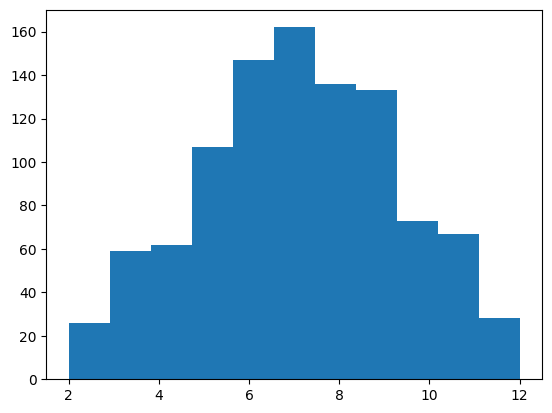

In [62]:
plt.hist(sums,11, weights = newlist)

Above I have checked that the outcomes are random but as expected. Both codes do the same thing.

In [63]:
def ComeOutRoll(TwoDice):
  s = sum(TwoDice)
  if (s == 2)|(s == 3)|(s==12):
    return 'Craps'
  elif (s == 7)|(s == 11):
    return 'comeAgain'
  else:
    return s #return the point

ComeOutRoll([4,4])

8

In [64]:
ComeOutRoll([6,6])

'Craps'

The `ComeOutRoll` is the first roll in the craps game.  There are three options **Craps** (2,3,12) **Natural** (7,11) (designated here as 'comeAgain' since you will get another come out roll.  Any othe value will set the point, the function just returns that number.

In [65]:
def SetPointRoll(TwoDice,point):
  s = sum(TwoDice)
  if s == 7:
    return 'SevenOut'
  elif s == point:
    return 'comeAgain'
  else:
    return point

SetPointRoll([5,4],9)

'comeAgain'

In [66]:
SetPointRoll([3,4],4)

'SevenOut'

In [67]:
SetPointRoll([3,1],5)

5

After the point has been set, you will roll over and over again until you **comeAgain** by hitting the same point or **SevenOut** by rolling a 7.  The function returns the point if neither of those happen.

In [68]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter


In [69]:
PlayCraps()

1

`PlayCraps` will play the game returning the number of rolls until you **Crap** or **SevenOut**.  Let's compute some statistics about it.

In [70]:
list1 = []
for i in range(100):
  list1.append(PlayCraps())
sum(list1)/len(list1)


7.38

(array([34., 29., 11.,  6.,  8.,  4.,  2.,  2.,  0.,  4.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

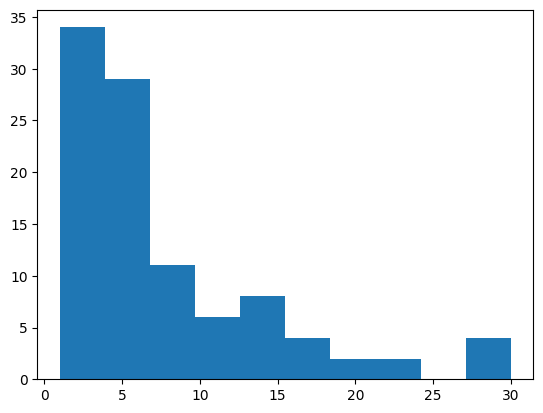

In [71]:
import matplotlib.pyplot as plt

plt.hist(list1)

The distribution is not normal! Seems like it is mostly just a few rolls. I wonder what the expected or average value is.

In [72]:
list2 = []
for j in range(200):
  list1 = []
  for i in range(100):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

(array([ 2., 14., 43., 50., 40., 36.,  9.,  4.,  1.,  1.]),
 array([5.22, 5.6 , 5.98, 6.36, 6.74, 7.12, 7.5 , 7.88, 8.26, 8.64, 9.02]),
 <BarContainer object of 10 artists>)

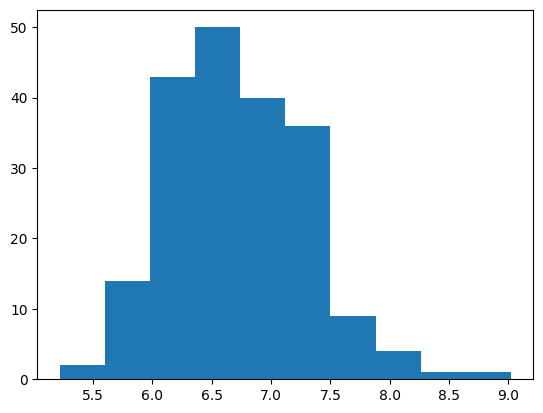

In [73]:
plt.hist(list2)

In [74]:
from numpy import mean

mean(list2)

6.72145

As I perused the internet for this value, I found lots of answers that were larger! How can that be! At first I thought I had the program wrong. Below I write some code to check the craps game by hand.

In [75]:
def ErrorTestingPlayCraps():
  listOfRolls = []
  randRoll = Roll2Dice()
  listOfRolls.append(randRoll)
  x = ComeOutRoll(randRoll)
  rollCounter = 1
  PassLineWins = 0
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      listOfRolls.append('Pass Line Win')
      PassLineWins += 1
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      x = ComeOutRoll(randRoll)
    else:
      point = x
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      listOfRolls.append(point)
      x = SetPointRoll(randRoll,point)
  else:
    listOfRolls.append(x)
  return rollCounter, listOfRolls

In [76]:
ErrorTestingPlayCraps()

(7,
 [[6, 2],
  [4, 5],
  8,
  [2, 6],
  8,
  'Pass Line Win',
  [2, 3],
  [1, 2],
  5,
  [1, 5],
  5,
  [4, 3],
  5,
  'SevenOut'])

In [77]:
ErrorTestingPlayCraps()

(3, [[4, 4], [1, 5], 8, [4, 3], 8, 'SevenOut'])

This simulation is more fun as it really shows you what happens on each roll.


Trying this ***many*** times, I did not see an error.  This makes me feel like the reference [here](https://wizardofodds.com/ask-the-wizard/craps/probability/) has an error in their computation.  Let's see if we can find the value theoretically we have simulated!

Here is the theoretical expected value.  Call the expected value $x$.  Then on the **ComeOutRoll**, craps results in the end of the game, natural results in playing the game again plus the roll you made and setting the point will result in a small game.

Each point will have a different expected value.  The point at 4 or 10 will result in an expected value of 4 (point rolls end with 4 or 7 $p = \frac{9}{36}$)  The game continues the probability of $\frac39$.  All the rest are similar.  This creates an expected value computation of

$$
x
=
\frac4{36}
+
\frac8{36}(x+1)
+
2\cdot \frac3{36}\left(4+1+\frac39x\right)
+
2\cdot \frac4{36}\left(3.6+1+\frac4{10}x\right)
+
2\cdot \frac5{36}\left(\frac{36}{11}+1+\frac5{11}x\right)
$$

In [78]:
import sympy

x = sympy.Symbol('x')
sympy.solve(4/36+8/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[6.65737051792830]

## Craps Revisited

After pinning over this for many weeks and months, I discovered my error!  I have a problem in the way I established the game.  The shooter is only required to pass the dice on a 'Seven Out'.  If the player hits craps, they may continue to roll.  You only pass the dice on a 'Seven Out'!  Let's adjust the code to reflect this reality.  First I present the analytic solution:

In [79]:
sympy.solve(4/36*(x+1)+8/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[8.52551020408164]

Next we will add the simulation.

In [80]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'SevenOut'):#remove the exiting with craps
    if (x == 'comeAgain')|(x == 'Craps'):#instead go back to the comout roll on craps
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter

In [81]:
list1 = []
for i in range(100):
  list1.append(PlayCraps())
sum(list1)/len(list1)

7.85

This seems close to the reported value although still random...

(array([ 1., 18., 35., 49., 45., 33., 12.,  4.,  1.,  2.]),
 array([ 6.82 ,  7.267,  7.714,  8.161,  8.608,  9.055,  9.502,  9.949,
        10.396, 10.843, 11.29 ]),
 <BarContainer object of 10 artists>)

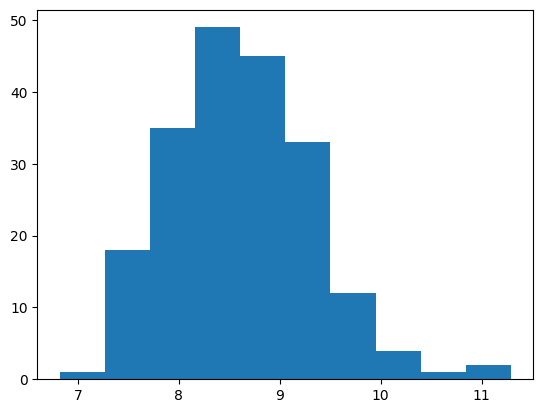

In [82]:
list2 = []
for j in range(200):
  list1 = []
  for i in range(100):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

plt.hist(list2)

In [83]:
mean(list2)

8.6062

That was the issue!  Now that we understand the game a bit better, time to hit the tables!

## References


**Shukla, P., &amp; Iriondo, R**. (2021, April 2). *Monte Carlo Simulation an In-depth Tutorial with Python*. Medium. Retrieved September 23, 2021, from https://pub.towardsai.net/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8#c5ea.

**Brownlee, J**. (2019, September 24). *A Gentle Introduction to Monte Carlo Sampling for Probability*. Machine Learning Mastery. Retrieved September 23, 2021, from https://machinelearningmastery.com/monte-carlo-sampling-for-probability/.  

https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-slides-and-files/MIT6_0002F16_lec6.pdf

**Hanbury, P**. (2019, January 26). *Monte Carlo Simulations with Python (part 1)*. Medium. Retrieved September 23, 2021, from https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0.

**Klusaite, L**. (2019, September 19). Craps for Dummies: How to Play Craps Online. PokerNews. Retrieved December 9, 2021, from https://www.pokernews.com/casino/craps-dummies-guide.htm.

**Moffitt, C**. (2019, February 18). *Monte Carlo Simulation with Python*. Practical Business Python Atom. Retrieved September 23, 2021, from https://pbpython.com/monte-carlo.html.

https://www.youtube.com/watch?v=BfS2H1y6tzQ

**Ferreira, B**. (2015, May 8). How Solitaire Inspired the World's Most Useful Simulation tool. VICE. Retrieved October 26, 2021, from https://www.vice.com/en/article/z4m75a/how-solitaire-inspired-the-worlds-most-useful-simulation-tool.

Encyclopædia Britannica, inc. (n.d.). Stanislaw Ulam. Encyclopædia Britannica. Retrieved October 26, 2021, from https://www.britannica.com/biography/Stanislaw-Ulam.


## Problems

**Definitions:**

1. How would you describe the process of the Monte Carlo Simulation?

2. What is the Law of large numbers?

3. How would you explain the premise of the Monty Hall Problem to someone?

**Questions:**

1. Would choosing to swap doors on the Monty Hall Problem continue to prove advantageous if there are more than three doors? Why or why not?

2. Example one shows that the number of coin flips in the experiment was increased from ten to ten thousand. For what reason would this change be beneficial to someone wanting to document the results?

3. What other applications might Monte Carlo have? List three examples.

4. For what reason was the Monte Carlo Simulation given its name?

5. What game did Stanislaw Ulam play while recovering from a viral encephalitus? How did that game become an important factor of the creation of the Monte Carlo Method?

6. In example one, would running only 100 experiments give an accurate answer? Why or why not?

7. Suppose that the dice in the Craps example was loaded so that the number six would come up half of the time while the rest of the numbers remain unchanged. What effect would this have on how the game of Craps is played? (Consider modifying example three's code to visualize this change)

## Project Idea: Black Jack

Black Jack is another gambling game that the Monte Carlo Simulation can calculate. The rules of the game can be find [here](https://bicyclecards.com/how-to-play/blackjack/) for more information. Can you create a code that calcuates the likelihood of a bust? If you can, create the chances that you will beat the dealer and compare the two outputs.

### Authors



Contributions were made by:

Darcie Kaiser

Tyler Evans

Nicholas Jacob

Jeremiah Fylstra